# Parsing PDFs Homework

With the power of pdfminer, pytesseract, Camelot, and Tika, let's analyze some documents!

> If at any point you think, **"I'm close enough, I'd just edit the rest of it in Excel"**: that's fine! Just make a note of it.

## A trick to use again and again

### Approach 1

Before we get started: when you want to take the first row of your data and set it as the header, use this trick.

In [237]:
import pandas as pd
import camelot

In [238]:
%matplotlib notebook

In [149]:
df = pd.DataFrame([
    [ 'fruit name', 'likes' ],
    [ 'apple', 15 ],
    [ 'carrot', 3 ],
    [ 'sweet potato', 45 ],
    [ 'peach', 12 ],
])
df

,0,1
0,fruit name,likes
1,apple,15
2,carrot,3
3,sweet potato,45
4,peach,12


In [151]:
# Set the first row as the columns
df.columns = df.loc[0]

# Drop the first row
df = df.drop(0)

df

,fruit name,likes
1,apple,15
2,carrot,3
3,sweet potato,45
4,peach,12


🚀 Done!

### Approach 2

Another alternative is to use `.rename` on your columns and just filter out the columns you aren't interested in. This can be useful if the column name shows up multiple times in your data for some reason or another.

In [152]:
# Starting with the same-ish data...
df = pd.DataFrame([
    [ 'fruit name', 'likes' ],
    [ 'apple', 15 ],
    [ 'carrot', 3 ],
    [ 'fruit name', 'likes' ],
    [ 'sweet potato', 45 ],
    [ 'peach', 12 ],
])
df

,0,1
0,fruit name,likes
1,apple,15
2,carrot,3
3,fruit name,likes
4,sweet potato,45
5,peach,12


In [153]:
df = df.rename(columns={
    0: 'fruit name',
    1: 'likes'
})
df = df[df['fruit name'] != 'fruit name']
df

,fruit name,likes
1,apple,15
2,carrot,3
4,sweet potato,45
5,peach,12


🚀 Done!

### Useful tips about coordinates

If you want to grab only a section of the page [Kull](https://jsoma.github.io/kull/#/) might be helpful in finding the coordinates.

> **Alternatively** run `%matplotlib notebook` in a cell. Afterwards, every time you use something like `camelot.plot(tables[0]).show()` it will get you nice zoomable, hoverable versions that include `x` and `y` coordinates as you move your mouse.

Coordinates are given as `"left_x,top_y,right_x,bottom_y"` with `(0,0)` being in the bottom left-hand corner.

Note that all coordinates are strings, for some reason. It won't be `[1, 2, 3, 4]` it will be `['1,2,3,4']`

# The homework

This is **mostly Camelot work**, because I don't really have any good image-based PDFs to stretch your wings on tesseract. If you know of any, let me know and I can put together another couple exercises.

## Prison Inmates

Working from [InmateList.pdf](InmateList.pdf), save a CSV file that includes every inmate.

* Make sure your rows are *all data*, and you don't have any people named "Inmate Name."


In [492]:
# Include all pages and check how many tables there are on each page
inmate_tables = camelot.read_pdf("InmateList.pdf", flavor='stream', pages='1-end', table_areas=['15,734,365,120'])
inmate_tables

<TableList n=16>

<IPython.core.display.Javascript object>


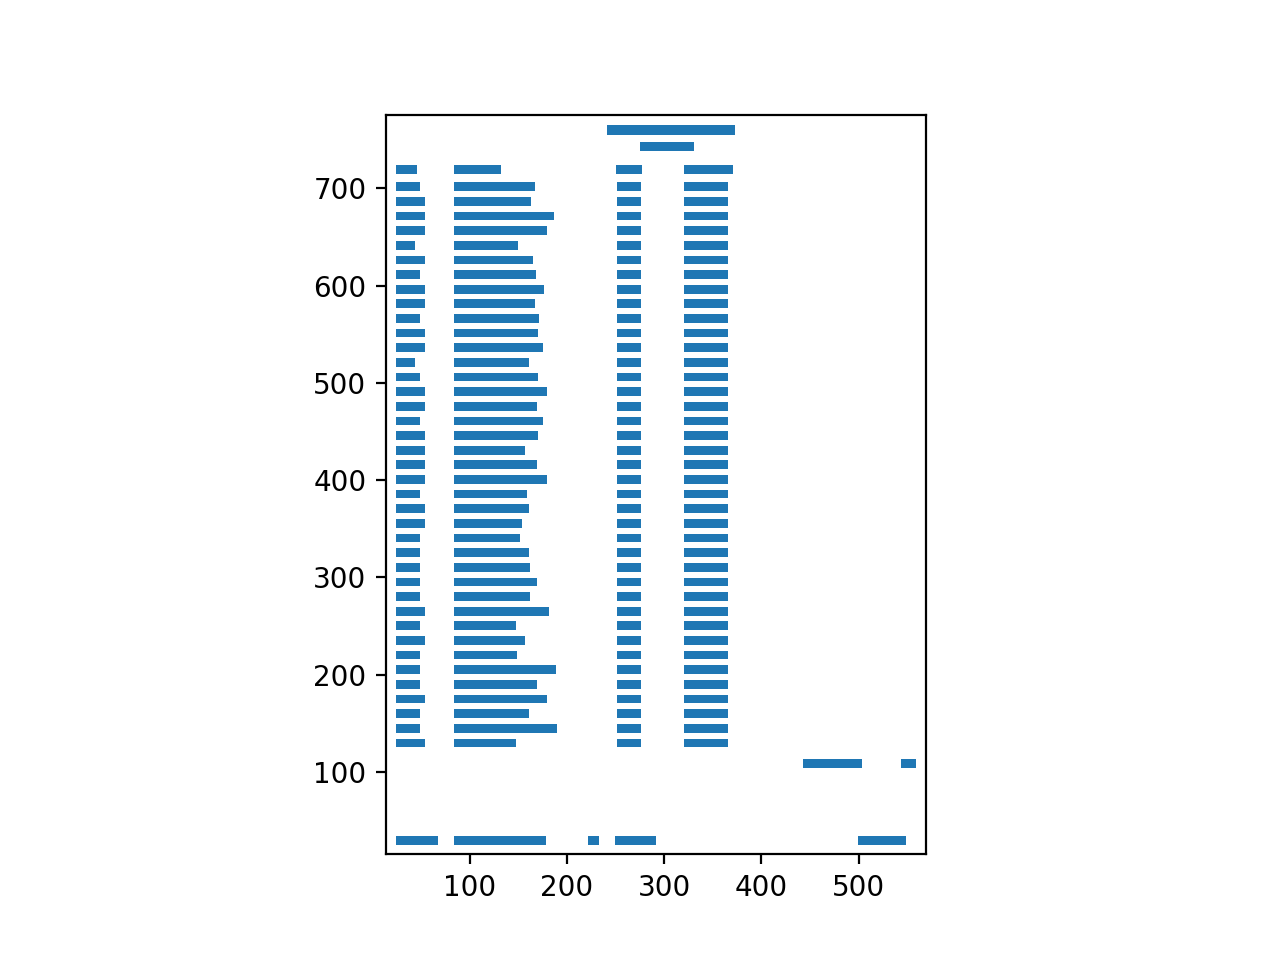

In [493]:
# Look at where table is
camelot.plot(inmate_tables[15]).show()

In [494]:
# Display all rows
pd.set_option('display.max_rows', 800)

In [495]:
# See what first table looks like
inmate_tables[0].df

,0,1,2,3
0,ICN #,Inmate Name,Facility,Booking Date
1,70693,"ABDALLAH, MICHAEL",ECHC,04/30/2021
2,152645,"ABDI, ABDI",ECCF,06/20/2021
3,144666,"ABDULLAH, DHAFIR",ECCF,06/17/2021
4,156374,"ACEVEDO, CARLOS",ECHC,06/06/2021
5,57243,"ACKER, RAYMOND P",ECCF,11/02/2020
6,68579,"ADAMS, JERMAIN C",ECHC,09/19/2019
7,45262,"ADAMS, MARQUIS",ECHC,05/27/2021
8,75738,"AKRIGHT, JOSEPH A",ECCF,05/29/2021
9,104048,"ALBERTSON, ANDREW",ECCF,12/04/2019


In [496]:
# List comprehension
# Combine tables by stacking on top of one another
# Reset index so there are no repeating values
df = [inmate_table.df for inmate_table in inmate_tables]
df = pd.concat(df, ignore_index=True)
df

,0,1,2,3
0,ICN #,Inmate Name,Facility,Booking Date
1,70693,"ABDALLAH, MICHAEL",ECHC,04/30/2021
2,152645,"ABDI, ABDI",ECCF,06/20/2021
3,144666,"ABDULLAH, DHAFIR",ECCF,06/17/2021
4,156374,"ACEVEDO, CARLOS",ECHC,06/06/2021
5,57243,"ACKER, RAYMOND P",ECCF,11/02/2020
6,68579,"ADAMS, JERMAIN C",ECHC,09/19/2019
7,45262,"ADAMS, MARQUIS",ECHC,05/27/2021
8,75738,"AKRIGHT, JOSEPH A",ECCF,05/29/2021
9,104048,"ALBERTSON, ANDREW",ECCF,12/04/2019


In [497]:
# Drop the rows that aren't required
df = df[df[1] != 'Inmate Name']

In [498]:
# Rename all the columns
df = df.rename(columns={
    0: 'ICN #',
    1: 'Inmate Name',
    2: 'Facility',
    3: 'Booking Date'
})
df

,ICN #,Inmate Name,Facility,Booking Date
1,70693,"ABDALLAH, MICHAEL",ECHC,04/30/2021
2,152645,"ABDI, ABDI",ECCF,06/20/2021
3,144666,"ABDULLAH, DHAFIR",ECCF,06/17/2021
4,156374,"ACEVEDO, CARLOS",ECHC,06/06/2021
5,57243,"ACKER, RAYMOND P",ECCF,11/02/2020
6,68579,"ADAMS, JERMAIN C",ECHC,09/19/2019
7,45262,"ADAMS, MARQUIS",ECHC,05/27/2021
8,75738,"AKRIGHT, JOSEPH A",ECCF,05/29/2021
9,104048,"ALBERTSON, ANDREW",ECCF,12/04/2019
10,1577,"ALEXANDER, BRIAN",ECHC,07/13/2021


In [500]:
# Convert it into a csv
df.to_csv('InmateList.csv', index=False)

In [501]:
# To see if there is missing data, try the following:
# df.count()
# value_counts()
# Scatter plot
# Box plot

# To look for duplicates, try the following:
# df.duplicated()
# df[df.duplicated() == True]
# df.loc[df.duplicated(), :]

## WHO resolutions

Using [A74_R13-en.pdf](A74_R13-en.pdf), what ten member countries are given the highest assessments?

* You might need to have two separate queries, and combine the results: that last page is pretty awful!
* Always rename your columns
* Double-check that your sorting looks right......
* You can still get the answer even without perfectly clean data

In [521]:
# Read tables from pages 1-5. Save page 6 for later because it needs cleaning up.
who_tables = camelot.read_pdf("A74_R13-en.pdf", flavor='stream', pages='1-5')
who_tables

<TableList n=5>

In [522]:
# Look at the first table
who_tables[0].df

,0,1
0,Members and,WHO scale
1,Associate Members,for 2022–2023
2,,%
3,Afghanistan,0.0070
4,Albania,0.0080
5,Algeria,0.1380
6,Andorra,0.0050
7,Angola,0.0100
8,Antigua and Barbuda,0.0020
9,Argentina,0.9151


In [523]:
# List comprehension
# Combine tables by stacking on top of one another
# Reset index so there are no repeating values
df = [who_table.df for who_table in who_tables]
df = pd.concat(df, ignore_index = True)
df

,0,1
0,Members and,WHO scale
1,Associate Members,for 2022–2023
2,,%
3,Afghanistan,0.0070
4,Albania,0.0080
5,Algeria,0.1380
6,Andorra,0.0050
7,Angola,0.0100
8,Antigua and Barbuda,0.0020
9,Argentina,0.9151


In [524]:
# Drop the first three rows
df = df.drop([0,1,2])

In [525]:
# Rename all the columns
df = df.rename(columns={
    0: 'Members and Associate Members',
    1: 'WHO scale for 2022–2023'
})
df

,Members and Associate Members,WHO scale for 2022–2023
3,Afghanistan,0.0070
4,Albania,0.0080
5,Algeria,0.1380
6,Andorra,0.0050
7,Angola,0.0100
8,Antigua and Barbuda,0.0020
9,Argentina,0.9151
10,Armenia,0.0070
11,Australia,2.2101
12,Austria,0.6770


In [526]:
# Remove rows that say 'Members and Associate Members' from first column
df = df[df['Members and Associate Members'] != 'Members and Associate Members']
df

,Members and Associate Members,WHO scale for 2022–2023
3,Afghanistan,0.0070
4,Albania,0.0080
5,Algeria,0.1380
6,Andorra,0.0050
7,Angola,0.0100
8,Antigua and Barbuda,0.0020
9,Argentina,0.9151
10,Armenia,0.0070
11,Australia,2.2101
12,Austria,0.6770


In [527]:
# Show the rows that still say 'Members and Associate Members' in the first column and '%' in the second column
df['Members and Associate Members'].str.contains('Members')
df['WHO scale for 2022–2023'].str.contains('%')

3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26      True
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74      True
75     False
76     False
77     False
78     False
79     False

In [528]:
# Show only the rows we want
df = df[df['Members and Associate Members'].str.contains('Members') == False]
df = df[df['WHO scale for 2022–2023'].str.contains('%') == False]
df

,Members and Associate Members,WHO scale for 2022–2023
3,Afghanistan,0.0070
4,Albania,0.0080
5,Algeria,0.1380
6,Andorra,0.0050
7,Angola,0.0100
8,Antigua and Barbuda,0.0020
9,Argentina,0.9151
10,Armenia,0.0070
11,Australia,2.2101
12,Austria,0.6770


In [529]:
# Replace blank cells with NaN
import numpy as np
df = df.replace(r'^\s*$', np.nan, regex=True)
df

,Members and Associate Members,WHO scale for 2022–2023
3,Afghanistan,0.0070
4,Albania,0.0080
5,Algeria,0.1380
6,Andorra,0.0050
7,Angola,0.0100
8,Antigua and Barbuda,0.0020
9,Argentina,0.9151
10,Armenia,0.0070
11,Australia,2.2101
12,Austria,0.6770


In [530]:
# Remove NaN from second column
df.dropna(subset=['WHO scale for 2022–2023'])

,Members and Associate Members,WHO scale for 2022–2023
3,Afghanistan,0.0070
4,Albania,0.0080
5,Algeria,0.1380
6,Andorra,0.0050
7,Angola,0.0100
8,Antigua and Barbuda,0.0020
9,Argentina,0.9151
10,Armenia,0.0070
11,Australia,2.2101
12,Austria,0.6770


In [531]:
df.shape

(200, 2)

In [532]:
# See how many tables there are on page 6
who_tables2 = camelot.read_pdf("A74_R13-en.pdf", flavor='stream', pages='6')
who_tables2

<TableList n=1>

In [533]:
# Look at the table on page 6
df2 = who_tables2[0].df
df2

,0,1,2,3,4
0,WHA74.13,,,,
1,,Members and,,WHO scale,
2,,Associate Members,,for 2022–2023,
3,,,,%,
4,,Zambia,,0.0090,
5,,Zimbabwe,,0.0050,
6,,TOTAL,,100.000,
7,,,,,"Seventh plenary meeting, 31 May 2021"
8,,,,,A74/VR/7
9,6,,= = =,,


In [534]:
# See whether Zambia row can be selected
df2[df2[1] == 'Zambia']

,0,1,2,3,4
4,,Zambia,,0.0090,


In [535]:
# Create a second table with Zambia and Zimbabwe rows
df2 = df2[(df2[1]=='Zambia') | (df2[1]=='Zimbabwe')]
df2

,0,1,2,3,4
4,,Zambia,,0.0090,
5,,Zimbabwe,,0.0050,


In [536]:
# Drop extra columns
df2 = df2.drop(columns=[0, 2, 4])
df2

,1,3
4,Zambia,0.0090
5,Zimbabwe,0.0050


In [537]:
# Rename columns
df2 = df2.rename(columns={
    1: 'Members and Associate Members',
    3: 'WHO scale for 2022–2023'
})
df2

,Members and Associate Members,WHO scale for 2022–2023
4,Zambia,0.0090
5,Zimbabwe,0.0050


In [538]:
# Combine the two tables and save as a new table
dfs = [df, df2]
df = pd.concat(dfs)
df

,Members and Associate Members,WHO scale for 2022–2023
3,Afghanistan,0.0070
4,Albania,0.0080
5,Algeria,0.1380
6,Andorra,0.0050
7,Angola,0.0100
8,Antigua and Barbuda,0.0020
9,Argentina,0.9151
10,Armenia,0.0070
11,Australia,2.2101
12,Austria,0.6770


In [539]:
# Sort the table by assessment
df.sort_values(by=['WHO scale for 2022–2023'], ascending=False)

,Members and Associate Members,WHO scale for 2022–2023
97,Japan,8.5645
77,Germany,6.0904
206,Northern Ireland,4.5673
70,France,4.4273
95,Italy,3.3072
208,United States of America,22.0000
29,Brazil,2.9482
37,Canada,2.7342
160,Russian Federation,2.4052
157,Republic of Korea,2.2671


In [540]:
# Since it's not sorting correctly, check datatype
df.dtypes

Members and Associate Members    object
WHO scale for 2022–2023          object
dtype: object

In [541]:
# Covert second column into a float
df['WHO scale for 2022–2023'] = df['WHO scale for 2022–2023'].astype(float)
df.dtypes

Members and Associate Members     object
WHO scale for 2022–2023          float64
dtype: object

In [544]:
# Sort table
# Show the top ten countries with the highest assessments
df = df.sort_values(by=['WHO scale for 2022–2023'], ascending=False)
df.head(10)

,Members and Associate Members,WHO scale for 2022–2023
208,United States of America,22.0000
41,China,12.0058
97,Japan,8.5645
77,Germany,6.0904
206,Northern Ireland,4.5673
70,France,4.4273
95,Italy,3.3072
29,Brazil,2.9482
37,Canada,2.7342
160,Russian Federation,2.4052


## The Avengers

Using [THE_AVENGERS.pdf](THE_AVENGERS.pdf), approximately how many lines does Captain America have as compared to Thor and Iron Man?

* Character names only: we're only counting `IRON MAN` as Iron Man, not `TONY`.
* Your new best friend might be `\n`
* Look up `.count` for strings

In [545]:
import tika
from tika import parser

In [546]:
# Read pdf with Tika
parsed = parser.from_file('THE_AVENGERS.pdf')

In [547]:
# Look at the keys
parsed.keys()

dict_keys(['metadata', 'content', 'status'])

In [548]:
# Check pdf
print(parsed['content'].strip())

Marvel’s THE AVENGERS

Written By

Joss Whedon

Story By

Zak Penn and Joss Whedon

Based on the characters appearing in the comic books

Published by MARVEL Comics

Transcribed to PDF using:

Celtx Studio | 2012

Composed In Celtx Studio

With the help of

SiOmniaFicta’s Script

on fanfiction.net

ENTERTAINMENT PURPOSES ONLY



1 EXT. UNKNOWN AREA OF SPACE 1

Space, a floating staircase among the rocks...THE OTHER

speaks to a DISEMBODIED FIGURE in a chair.

THE OTHER (V.O)

The Tesseract has awakened. It is

on a little world, a human world.

They would wield its power.

THE OTHER hands LOKI a scepter with a glowing blue gem...

THE OTHER (V.O)

But our ally knows its workings as

they never will. He is ready to

lead. And our force...

The CHITAURI put on their face mask and get ready.

THE OTHER (V.O)

...our Chitauri, will follow. The

world will be his...the universe,

yours. And the humans, what can

they do but burn?

A 3d model of the Tesseract, we move inside it slowly

2 EXT

In [549]:
# Find out number of lines for IRON MAN
IRON_MAN = parsed['content'].strip().count('\nIRON MAN\n')
IRON_MAN

19

In [550]:
# Find out number of lines for THOR
THOR = parsed['content'].strip().count('\nTHOR\n')
THOR

47

In [551]:
# Find out number of lines for CAPTAIN AMERICA
CAPTAIN_AMERICA = parsed['content'].strip().count('\nCAPTAIN AMERICA\n')
CAPTAIN_AMERICA

35

## COVID data

Using [covidweekly2721.pdf](covidweekly2721.pdf), what's the total number of tests performed in Minnesota? Use the Laboratory Test Rates by County of Residence chart.

* You COULD pull both tables separately OR you could pull them both at once and split them in pandas.
* Remember you can do things like `df[['name','age']]` to ask for multiple columns

In [588]:
# Read tables on page 6
covid_tables = camelot.read_pdf("covidweekly2721.pdf", flavor='lattice', pages='6')
covid_tables

<TableList n=2>

In [589]:
# Look at the first table
covid_tables[1].df

,0,1,2,3,4,5
0,County,Number of Tests,Cumulative Rate,County,Number of Tests,Cumulative Rate
1,Aitkin,"19,204","12,128",Martin,"39,876","19,974"
2,Anoka,"545,958","15,714",McLeod,"61,300","17,111"
3,Becker,"59,238","17,540",Meeker,"37,736","16,351"
4,Beltrami,"60,345","13,085",Mille Lacs,"44,688","17,369"
5,Benton,"77,865\n9,953","26,976",Morrison,"59,179","17,961"
6,Big Stone,"13,220","26,356",Mower,"79,446","20,061"
7,Blue Earth,"136,895","20,641",Murray,"15,175","18,167"
8,Brown,"55,709","22,097",Nicollet,"66,163","19,585"
9,Carlton,"79,882","22,477",Nobles,"30,979","14,185"


In [590]:
# Save as a table
df = pd.DataFrame(covid_tables[1].df)
df

,0,1,2,3,4,5
0,County,Number of Tests,Cumulative Rate,County,Number of Tests,Cumulative Rate
1,Aitkin,"19,204","12,128",Martin,"39,876","19,974"
2,Anoka,"545,958","15,714",McLeod,"61,300","17,111"
3,Becker,"59,238","17,540",Meeker,"37,736","16,351"
4,Beltrami,"60,345","13,085",Mille Lacs,"44,688","17,369"
5,Benton,"77,865\n9,953","26,976",Morrison,"59,179","17,961"
6,Big Stone,"13,220","26,356",Mower,"79,446","20,061"
7,Blue Earth,"136,895","20,641",Murray,"15,175","18,167"
8,Brown,"55,709","22,097",Nicollet,"66,163","19,585"
9,Carlton,"79,882","22,477",Nobles,"30,979","14,185"


In [591]:
# Set the first row as the columns
df.columns = df.loc[0]

In [592]:
# Drop first row
df = df.drop(0)
df

,County,Number of Tests,Cumulative Rate,County,Number of Tests,Cumulative Rate
1,Aitkin,"19,204","12,128",Martin,"39,876","19,974"
2,Anoka,"545,958","15,714",McLeod,"61,300","17,111"
3,Becker,"59,238","17,540",Meeker,"37,736","16,351"
4,Beltrami,"60,345","13,085",Mille Lacs,"44,688","17,369"
5,Benton,"77,865\n9,953","26,976",Morrison,"59,179","17,961"
6,Big Stone,"13,220","26,356",Mower,"79,446","20,061"
7,Blue Earth,"136,895","20,641",Murray,"15,175","18,167"
8,Brown,"55,709","22,097",Nicollet,"66,163","19,585"
9,Carlton,"79,882","22,477",Nobles,"30,979","14,185"
10,Carver,"154,305","15,367",Norman,"11,471","17,489"


In [593]:
# The tables are stacked side by side so that needs to be fixed
# Get the first table by selecting the first three columns
df1 = df.iloc[:, 0:3]
df1

,County,Number of Tests,Cumulative Rate
1,Aitkin,"19,204","12,128"
2,Anoka,"545,958","15,714"
3,Becker,"59,238","17,540"
4,Beltrami,"60,345","13,085"
5,Benton,"77,865\n9,953","26,976"
6,Big Stone,"13,220","26,356"
7,Blue Earth,"136,895","20,641"
8,Brown,"55,709","22,097"
9,Carlton,"79,882","22,477"
10,Carver,"154,305","15,367"


In [594]:
# Get the second table by selecting the last three columns
df2 = df.iloc[:, 3:6]
df2

,County,Number of Tests,Cumulative Rate
1,Martin,"39,876","19,974"
2,McLeod,"61,300","17,111"
3,Meeker,"37,736","16,351"
4,Mille Lacs,"44,688","17,369"
5,Morrison,"59,179","17,961"
6,Mower,"79,446","20,061"
7,Murray,"15,175","18,167"
8,Nicollet,"66,163","19,585"
9,Nobles,"30,979","14,185"
10,Norman,"11,471","17,489"


In [595]:
# Since we have to do calculations, remove commas from first table
# Row 5 is wonky - 77865\n9953
df1 = df1.replace(',','', regex=True)
df1

,County,Number of Tests,Cumulative Rate
1,Aitkin,19204,12128
2,Anoka,545958,15714
3,Becker,59238,17540
4,Beltrami,60345,13085
5,Benton,77865\n9953,26976
6,Big Stone,13220,26356
7,Blue Earth,136895,20641
8,Brown,55709,22097
9,Carlton,79882,22477
10,Carver,154305,15367


In [596]:
# To remove 77865\n9953 from row 5, 
df1[['Number of Tests']] = df1[['Number of Tests']].replace('77865\n9953', '77865', regex=False)
df1

,County,Number of Tests,Cumulative Rate
1,Aitkin,19204,12128
2,Anoka,545958,15714
3,Becker,59238,17540
4,Beltrami,60345,13085
5,Benton,77865,26976
6,Big Stone,13220,26356
7,Blue Earth,136895,20641
8,Brown,55709,22097
9,Carlton,79882,22477
10,Carver,154305,15367


In [597]:
# And remove commas from second table
df2 = df2.replace(',','', regex=True)
df2

,County,Number of Tests,Cumulative Rate
1,Martin,39876,19974
2,McLeod,61300,17111
3,Meeker,37736,16351
4,Mille Lacs,44688,17369
5,Morrison,59179,17961
6,Mower,79446,20061
7,Murray,15175,18167
8,Nicollet,66163,19585
9,Nobles,30979,14185
10,Norman,11471,17489


In [598]:
# Convert 'Number of Tests' column from string to integers in both tables
# Check to see whether there are integers
df1[['Number of Tests']] = df1[['Number of Tests']].apply(pd.to_numeric)
df2[['Number of Tests']] = df2[['Number of Tests']].apply(pd.to_numeric)
df1.dtypes

0
County             object
Number of Tests     int64
Cumulative Rate    object
dtype: object

In [604]:
# Calculate total number of tests in Minnesota by adding the sums of both tables
total_tests = df1.sum() + df2.sum()
total_tests

0
County             AitkinAnokaBeckerBeltramiBentonBig StoneBlue E...
Number of Tests                                             10249823
Cumulative Rate    1212815714175401308526976263562064122097224771...
dtype: object

## Theme Parks

Using [2019-Theme-Index-web-1.pdf](2019-Theme-Index-web-1.pdf), save a CSV of the top 10 theme park groups worldwide.

* You can clean the results or you can restrict the area the table is pulled from, up to you

In [605]:
# Look at page 11
themeparks_tables = camelot.read_pdf("2019-Theme-Index-web-1.pdf", flavor='stream', pages='11', table_areas=['35,464,408,296'])
themeparks_tables

<TableList n=1>

<IPython.core.display.Javascript object>


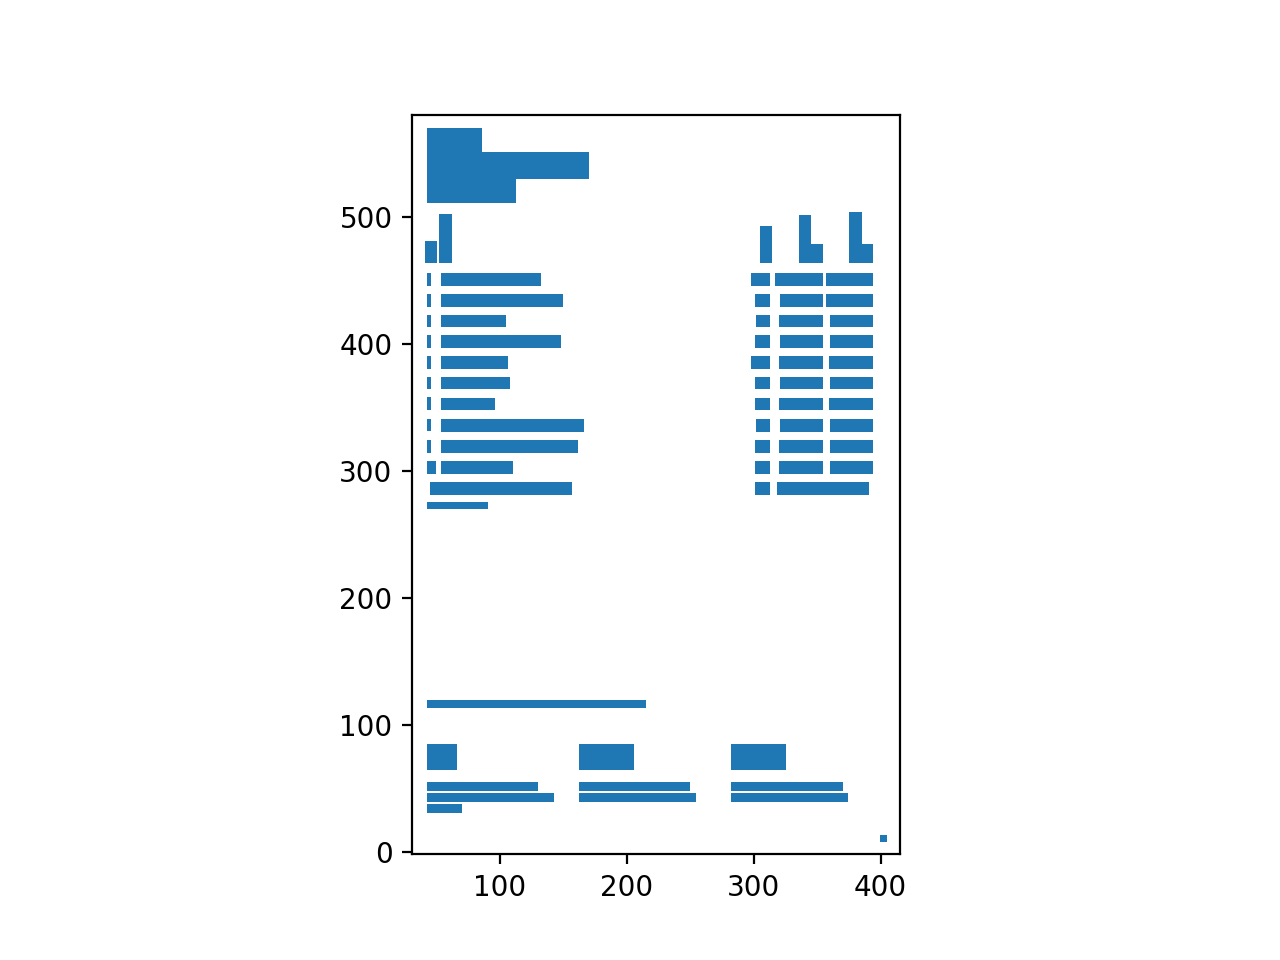

In [606]:
# Look at where table is
# Vertical-aligned text makes table wonky so don't include that
# "left_x,top_y,right_x,bottom_y"
camelot.plot(themeparks_tables[0]).show()

In [607]:
# Look at the table
df = themeparks_tables[0].df
df

,0,1,2,3,4
0,1,WALT DISNEY ATTRACTIONS,-0.8%,"155,991,000","157,311,000"
1,2,MERLIN ENTERTAINMENTS GROUP,0.9%,"67,000,000","66,400,000*"
2,3,OCT PARKS CHINA,9.4%,"53,970,000","49,350,000"
3,4,UNIVERSAL PARKS AND RESORTS,2.3%,"51,243,000","50,068,000"
4,5,FANTAWILD GROUP,19.8%,"50,393,000","42,074,000"
5,6,CHIMELONG GROUP,8.9%,"37,018,000","34,007,000"
6,7,SIX FLAGS INC.,2.5%,"32,811,000","32,024,000"
7,8,CEDAR FAIR ENTERTAINMENT COMPANY,7.8%,"27,938,000","25,912,000"
8,9,SEAWORLD PARKS & ENTERTAINMENT,0.2%,"22,624,000","22,582,000"
9,10,PARQUES REUNIDOS,6.2%,"22,195,000","20,900,000"


In [608]:
# Rename all the columns
df = df.rename(columns={
    0: 'Rank',
    1: 'Group Name',
    2: '% Change',
    3: 'Attendance 2019',
    4: 'Attendance 2018'
})
df

,Rank,Group Name,% Change,Attendance 2019,Attendance 2018
0,1,WALT DISNEY ATTRACTIONS,-0.8%,"155,991,000","157,311,000"
1,2,MERLIN ENTERTAINMENTS GROUP,0.9%,"67,000,000","66,400,000*"
2,3,OCT PARKS CHINA,9.4%,"53,970,000","49,350,000"
3,4,UNIVERSAL PARKS AND RESORTS,2.3%,"51,243,000","50,068,000"
4,5,FANTAWILD GROUP,19.8%,"50,393,000","42,074,000"
5,6,CHIMELONG GROUP,8.9%,"37,018,000","34,007,000"
6,7,SIX FLAGS INC.,2.5%,"32,811,000","32,024,000"
7,8,CEDAR FAIR ENTERTAINMENT COMPANY,7.8%,"27,938,000","25,912,000"
8,9,SEAWORLD PARKS & ENTERTAINMENT,0.2%,"22,624,000","22,582,000"
9,10,PARQUES REUNIDOS,6.2%,"22,195,000","20,900,000"


In [609]:
# Convert it into a csv
df.to_csv('TopTenThemeParks.csv', index=False)

## Hunting licenses

Using [US_Fish_and_Wildlife_Service_2021.pdf](US_Fish_and_Wildlife_Service_2021.pdf) and [a CSV of state populations](http://goodcsv.com/geography/us-states-territories/), find the states with the highest per-capita hunting license holders.

In [626]:
# Read pdf
hunting_tables = camelot.read_pdf("US_Fish_and_Wildlife_Service_2021.pdf", flavor='lattice', pages='1')
hunting_tables

<TableList n=1>

In [627]:
# Look at the table
df = hunting_tables[0].df
df

,0,1,2,3,4,5,6,7
0,State,Paid Hunting License \nHolders*,"Resident Hunting Licenses,\nTags, Permits and ...","Non-Resident Hunting \nLicenses,\nTags, Permit...","Total Hunting License, \nTags,Permits & Stamps**","Cost - Resident Hunting \nLicenses,\nTags, Per...","Cost - Non-Resident Hunting \nLicenses,\nTags,...",Gross Cost - Hunting \nLicenses
1,AK,"93,559","423,501","59,235","482,736","$4,859,356","$9,046,715","$13,906,071"
2,AL,"452,400","601,683","45,397","647,080","$9,700,295","$6,715,734","$16,416,029"
3,AR,"343,300","349,098","150,728","499,826","$7,851,601","$11,271,653","$19,123,254"
4,AS,0,0,0,0,$0,$0,$0
5,AZ,"302,383","464,607","88,708","553,315","$13,931,397","$5,968,169","$19,899,566"
6,CA,"262,009","949,540","25,535","975,075","$20,270,941","$1,114,625","$21,385,566"
7,CO,"296,609","481,253","120,954","602,207","$13,270,492","$49,732,815","$63,003,307"
8,CT,"32,052","101,377","4,543","105,920","$1,855,046","$372,108","$2,227,154"
9,DC,0,0,0,0,$0,$0,$0


In [628]:
# Make the first row the columns
df.columns = df.loc[0]
df

,State,Paid Hunting License \nHolders*,"Resident Hunting Licenses,\nTags, Permits and Stamps","Non-Resident Hunting \nLicenses,\nTags, Permits and Stamps","Total Hunting License, \nTags,Permits & Stamps**","Cost - Resident Hunting \nLicenses,\nTags, Permits and Stamps","Cost - Non-Resident Hunting \nLicenses,\nTags, Permits and Stamps",Gross Cost - Hunting \nLicenses
0,State,Paid Hunting License \nHolders*,"Resident Hunting Licenses,\nTags, Permits and ...","Non-Resident Hunting \nLicenses,\nTags, Permit...","Total Hunting License, \nTags,Permits & Stamps**","Cost - Resident Hunting \nLicenses,\nTags, Per...","Cost - Non-Resident Hunting \nLicenses,\nTags,...",Gross Cost - Hunting \nLicenses
1,AK,"93,559","423,501","59,235","482,736","$4,859,356","$9,046,715","$13,906,071"
2,AL,"452,400","601,683","45,397","647,080","$9,700,295","$6,715,734","$16,416,029"
3,AR,"343,300","349,098","150,728","499,826","$7,851,601","$11,271,653","$19,123,254"
4,AS,0,0,0,0,$0,$0,$0
5,AZ,"302,383","464,607","88,708","553,315","$13,931,397","$5,968,169","$19,899,566"
6,CA,"262,009","949,540","25,535","975,075","$20,270,941","$1,114,625","$21,385,566"
7,CO,"296,609","481,253","120,954","602,207","$13,270,492","$49,732,815","$63,003,307"
8,CT,"32,052","101,377","4,543","105,920","$1,855,046","$372,108","$2,227,154"
9,DC,0,0,0,0,$0,$0,$0


In [629]:
# Drop the first row
df = df.drop(0)
df

,State,Paid Hunting License \nHolders*,"Resident Hunting Licenses,\nTags, Permits and Stamps","Non-Resident Hunting \nLicenses,\nTags, Permits and Stamps","Total Hunting License, \nTags,Permits & Stamps**","Cost - Resident Hunting \nLicenses,\nTags, Permits and Stamps","Cost - Non-Resident Hunting \nLicenses,\nTags, Permits and Stamps",Gross Cost - Hunting \nLicenses
1,AK,"93,559","423,501","59,235","482,736","$4,859,356","$9,046,715","$13,906,071"
2,AL,"452,400","601,683","45,397","647,080","$9,700,295","$6,715,734","$16,416,029"
3,AR,"343,300","349,098","150,728","499,826","$7,851,601","$11,271,653","$19,123,254"
4,AS,0,0,0,0,$0,$0,$0
5,AZ,"302,383","464,607","88,708","553,315","$13,931,397","$5,968,169","$19,899,566"
6,CA,"262,009","949,540","25,535","975,075","$20,270,941","$1,114,625","$21,385,566"
7,CO,"296,609","481,253","120,954","602,207","$13,270,492","$49,732,815","$63,003,307"
8,CT,"32,052","101,377","4,543","105,920","$1,855,046","$372,108","$2,227,154"
9,DC,0,0,0,0,$0,$0,$0
10,DE,"15,619","45,997","6,044","52,041","$899,857","$499,867","$1,399,724"


In [630]:
# Remove extra spaces
df['State'] = df.State.str.strip()

In [631]:
# Read csv file
states = pd.read_csv("us-states-territories.csv")
states

,Type,Name,Abbreviation,Capital,Population (2015),Population (2019),area (square miles)
0,State,Alabama,AL,Montgomery,NaN,"4,903,185","52,420"
1,State,Alaska,AK,Juneau,NaN,"731,545","665,384"
2,State,Arizona,AZ,Phoenix,NaN,"7,278,717","113,990"
3,State,Arkansas,AR,Little Rock,NaN,"3,017,804","53,179"
4,State,California,CA,Sacramento,NaN,"39,512,223","163,695"
5,State,Colorado,CO,Denver,NaN,"5,758,736","104,094"
6,State,Connecticut,CT,Hartford,NaN,"3,565,278","5,543"
7,State,Delaware,DE,Dover,NaN,"973,764","2,489"
8,State,Florida,FL,Tallahassee,NaN,"21,477,737","65,758"
9,State,Georgia,GA,Atlanta,NaN,"10,617,423","59,425"


In [632]:
# Remove extra spaces
states['Abbreviation'] = states.Abbreviation.str.strip()

In [633]:
# Combine the two dfs
combined_table = df.merge(states, left_on='State', right_on='Abbreviation')
combined_table

,State,Paid Hunting License \nHolders*,"Resident Hunting Licenses,\nTags, Permits and Stamps","Non-Resident Hunting \nLicenses,\nTags, Permits and Stamps","Total Hunting License, \nTags,Permits & Stamps**","Cost - Resident Hunting \nLicenses,\nTags, Permits and Stamps","Cost - Non-Resident Hunting \nLicenses,\nTags, Permits and Stamps",Gross Cost - Hunting \nLicenses,Type,Name,Abbreviation,Capital,Population (2015),Population (2019),area (square miles)
0,AK,"93,559","423,501","59,235","482,736","$4,859,356","$9,046,715","$13,906,071",State,Alaska,AK,Juneau,NaN,"731,545","665,384"
1,AL,"452,400","601,683","45,397","647,080","$9,700,295","$6,715,734","$16,416,029",State,Alabama,AL,Montgomery,NaN,"4,903,185","52,420"
2,AR,"343,300","349,098","150,728","499,826","$7,851,601","$11,271,653","$19,123,254",State,Arkansas,AR,Little Rock,NaN,"3,017,804","53,179"
3,AS,0,0,0,0,$0,$0,$0,Territory,American Samoa,AS,Pago Pago,"57,400",NaN,581
4,AZ,"302,383","464,607","88,708","553,315","$13,931,397","$5,968,169","$19,899,566",State,Arizona,AZ,Phoenix,NaN,"7,278,717","113,990"
5,CA,"262,009","949,540","25,535","975,075","$20,270,941","$1,114,625","$21,385,566",State,California,CA,Sacramento,NaN,"39,512,223","163,695"
6,CO,"296,609","481,253","120,954","602,207","$13,270,492","$49,732,815","$63,003,307",State,Colorado,CO,Denver,NaN,"5,758,736","104,094"
7,CT,"32,052","101,377","4,543","105,920","$1,855,046","$372,108","$2,227,154",State,Connecticut,CT,Hartford,NaN,"3,565,278","5,543"
8,DC,0,0,0,0,$0,$0,$0,Federal District,District of Columbia,DC,NaN,NaN,"705,749",68
9,DE,"15,619","45,997","6,044","52,041","$899,857","$499,867","$1,399,724",State,Delaware,DE,Dover,NaN,"973,764","2,489"


In [634]:
# Clean up table so it only shows the columns needed to calculate per capita hunting licenses - population and total hunting licenses
updated_df = combined_table[['State', 'Name','Population (2019)','Total Hunting License, \nTags,Permits & Stamps**']]
updated_df

,State,Name,Population (2019),"Total Hunting License, \nTags,Permits & Stamps**"
0,AK,Alaska,"731,545","482,736"
1,AL,Alabama,"4,903,185","647,080"
2,AR,Arkansas,"3,017,804","499,826"
3,AS,American Samoa,NaN,0
4,AZ,Arizona,"7,278,717","553,315"
5,CA,California,"39,512,223","975,075"
6,CO,Colorado,"5,758,736","602,207"
7,CT,Connecticut,"3,565,278","105,920"
8,DC,District of Columbia,"705,749",0
9,DE,Delaware,"973,764","52,041"


In [635]:
# Check to see whether columns are strings or objects before doing calculations
type(updated_df['Population (2019)'][1])
# type(updated_df['Total Hunting License, \nTags,Permits & Stamps**'][1])

str

In [636]:
# Remove spaces and convert license column from string to integer
# Create a new column called 'total licenses'
updated_df['total_licenses'] = updated_df['Total Hunting License, \nTags,Permits & Stamps**'].str.replace(",", "").astype(int)
updated_df

<ipython-input-636-a7e569aa319d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df['total_licenses'] = updated_df['Total Hunting License, \nTags,Permits & Stamps**'].str.replace(",", "").astype(int)


,State,Name,Population (2019),"Total Hunting License, \nTags,Permits & Stamps**",total_licenses
0,AK,Alaska,"731,545","482,736",482736
1,AL,Alabama,"4,903,185","647,080",647080
2,AR,Arkansas,"3,017,804","499,826",499826
3,AS,American Samoa,NaN,0,0
4,AZ,Arizona,"7,278,717","553,315",553315
5,CA,California,"39,512,223","975,075",975075
6,CO,Colorado,"5,758,736","602,207",602207
7,CT,Connecticut,"3,565,278","105,920",105920
8,DC,District of Columbia,"705,749",0,0
9,DE,Delaware,"973,764","52,041",52041


In [637]:
# Drop NaN values
updated_df = updated_df.dropna()

In [638]:
# Remove spaces and convert population column from string to integer
# Create a new column called 'population'
updated_df['population'] = updated_df['Population (2019)'].str.replace(",", "").astype(int)
updated_df

<ipython-input-638-61ecf9e812ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df['population'] = updated_df['Population (2019)'].str.replace(",", "").astype(int)


,State,Name,Population (2019),"Total Hunting License, \nTags,Permits & Stamps**",total_licenses,population
0,AK,Alaska,"731,545","482,736",482736,731545
1,AL,Alabama,"4,903,185","647,080",647080,4903185
2,AR,Arkansas,"3,017,804","499,826",499826,3017804
4,AZ,Arizona,"7,278,717","553,315",553315,7278717
5,CA,California,"39,512,223","975,075",975075,39512223
6,CO,Colorado,"5,758,736","602,207",602207,5758736
7,CT,Connecticut,"3,565,278","105,920",105920,3565278
8,DC,District of Columbia,"705,749",0,0,705749
9,DE,Delaware,"973,764","52,041",52041,973764
10,FL,Florida,"21,477,737","295,399",295399,21477737


In [639]:
# Calculate per capita licenses 
# Create a new column called 'per_capita'
updated_df['per_capita'] = updated_df['total_licenses'] / updated_df['population']
updated_df

<ipython-input-639-cda1472e2d71>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df['per_capita'] = updated_df['total_licenses'] / updated_df['population']


,State,Name,Population (2019),"Total Hunting License, \nTags,Permits & Stamps**",total_licenses,population,per_capita
0,AK,Alaska,"731,545","482,736",482736,731545,0.659886
1,AL,Alabama,"4,903,185","647,080",647080,4903185,0.131971
2,AR,Arkansas,"3,017,804","499,826",499826,3017804,0.165626
4,AZ,Arizona,"7,278,717","553,315",553315,7278717,0.076018
5,CA,California,"39,512,223","975,075",975075,39512223,0.024678
6,CO,Colorado,"5,758,736","602,207",602207,5758736,0.104573
7,CT,Connecticut,"3,565,278","105,920",105920,3565278,0.029709
8,DC,District of Columbia,"705,749",0,0,705749,0.000000
9,DE,Delaware,"973,764","52,041",52041,973764,0.053443
10,FL,Florida,"21,477,737","295,399",295399,21477737,0.013754


In [640]:
# Sort table to find the states with the highest per-capita hunting license holders
updated_df = updated_df.sort_values(by=['per_capita'], ascending=False)
updated_df

,State,Name,Population (2019),"Total Hunting License, \nTags,Permits & Stamps**",total_licenses,population,per_capita
29,MT,Montana,"1,068,778","1,039,656",1039656,1068778,0.972752
15,ID,Idaho,"1,787,065","1,660,649",1660649,1787065,0.929261
53,WI,Wisconsin,"5,822,434","4,202,006",4202006,5822434,0.721692
0,AK,Alaska,"731,545","482,736",482736,731545,0.659886
31,ND,North Dakota,"762,062","502,166",502166,762062,0.658957
55,WY,Wyoming,"578,759","269,714",269714,578759,0.466021
45,SD,South Dakota,"884,659","356,961",356961,884659,0.403501
54,WV,West Virginia,"1,792,147","628,413",628413,1792147,0.350648
40,OR,Oregon,"4,217,737","1,318,213",1318213,4217737,0.312540
26,MO,Missouri,"6,137,428","1,811,870",1811870,6137428,0.295216
